In [1]:
import pandas as pd
import numpy as np

# Data Viz library
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
Insurance= pd.read_excel('insurance.xlsx', sheet_name = 'Train')

In [3]:
Insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
Insurance.describe() # describe ให้ข้อมูลเชิงสถิติในแต่ละ column 

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


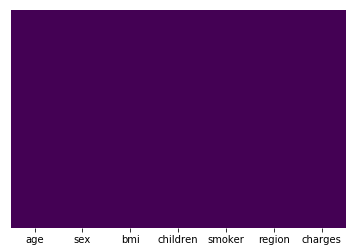

In [5]:
# ตรวจสอบ Missing value ด้วย heatmap

# หากข้อมูลมี Missing สามารถจัดการได้ตามบทเรียนที่ผ่านมา
sns.heatmap(Insurance.isnull(), yticklabels=False, cbar = False, cmap= 'viridis')

In [6]:
Insurance.replace([np.inf, -np.inf], np.nan)

Insurance.isnull().any() # function check ค่าว่าง ถ้ามีค่าว่าง return true

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [7]:
X = Insurance.drop(columns=['charges'],axis=1)
y = Insurance ['charges']

In [9]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [11]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [12]:
X = pd.get_dummies(X, columns=['sex', 'smoker','region'])
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [13]:
# ใช้วิธี Hold out แบ่ง Test 20 และ Train 80

from sklearn.model_selection import train_test_split

In [14]:
# กด  shift + tab หลังคำว่า split แล้วกดเครื่องหมาย + เพื่อดูตัวอย่างคำสั่งการแบ่งชุดข้อมูล

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [15]:
# Import "LinearRegression" from scikit-learn

from sklearn.linear_model import LinearRegression

In [16]:
# ตั้งชื่อ Linear Regression model ว่า "lm"

lm = LinearRegression()

In [17]:
# สร้าง model regression

lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
pred = lm.predict(X_test)

pred

array([10870.1944927 ,  2931.00956297, 10552.51567371, 27006.85847048,
        6216.46537304,   435.84815599, 15346.22045379,  3968.90411373,
       11162.77917975,  6826.31516327,  8228.43994448, 10752.07010885,
        6493.16868789, 12750.67606087, 30972.77228568, 36900.78120104,
       10488.62527205,  2871.23239228, 15159.89602534, 13820.53590276,
       30077.91555121,  7351.38487978, 12740.73649161,  5913.04211057,
         470.51851803, 25134.8518974 , 12193.48072537, 27390.20736285,
       37879.6989273 ,  4478.70241246,  6057.81828673,  7238.28213158,
        3554.81585714,  2545.81224213,  5715.91485337,  5965.34699386,
         335.76084422, 12339.02151423, 13784.37910081, 11013.52985855,
       10292.80573926,  9627.9173202 , 14866.10427165, 10325.69750784,
        6312.6243494 ,  6168.4221984 ,  8244.90205016,  2131.35276428,
       12719.76653888,  2212.00221052, -1450.95921631,  2464.19984494,
        7271.86578049,  8672.32977973,  4309.78778387, 14275.06733065,
      

In [19]:
y_test.head()

44       6079.67150
134      2457.21115
980     25517.11363
618     34439.85590
1238     6985.50695
Name: charges, dtype: float64

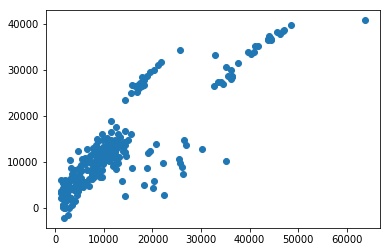

In [20]:
plt.scatter(y_test,pred)

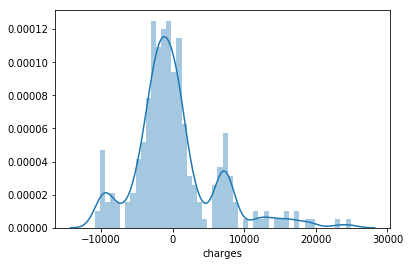

In [21]:
# Residual are the difference between the actual values and predicted values

# Residual --> Normal distribution means your model was a correct prediction for the data
sns.distplot((y_test-pred),bins=50);

In [22]:
from sklearn import metrics

In [23]:
print('MAE', metrics.mean_absolute_error(y_test, pred))
print('MSE', metrics.mean_squared_error(y_test, pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE 4036.8740283584293
MSE 33748393.37059586
RMSE 5809.3367410226665


In [25]:
# Merge Back Training Data to use in statsmodel
# statsTrain = X_train.merge(pd.DataFrame(y_train))
statsTrain = X_train.join(pd.DataFrame(y_train)) # library regression
statsTrain.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
804,23,26.510,0,0,1,1,0,0,0,1,0,1815.87590
354,18,38.280,0,1,0,1,0,0,0,1,0,14133.03775
563,50,44.770,1,0,1,1,0,0,0,1,0,9058.73030
1177,40,27.400,1,1,0,1,0,0,0,0,1,6496.88600
390,48,35.625,4,0,1,1,0,1,0,0,0,10736.87075


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.formula.api as smf  # เป็น library หลัก ไม่ต้องแยก x,y
from scipy import stats

In [34]:
### STATSMODELS ###

# create a fitted model using all Xs
lm = smf.ols(formula='charges ~ age + bmi + children +region_northeast+ region_northwest + region_southeast + region_southwest + sex_male + sex_female+ smoker_yes+smoker_no', data=statsTrain).fit() # .fit หา สัมประสิทธิ์

# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     392.8
Date:                Sat, 21 Dec 2019   Prob (F-statistic):          7.34e-311
Time:                        21:29:04   Log-Likelihood:                -10846.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1061   BIC:                         2.175e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -447.2639    489.589     -0.914      0.361   -1407.937     513.409
age                244.5066     13.556     18.037      0.000     217.908     271.105
bmi                364.9512     32.286     11.304      0.000     301.600     428.302
children           413.0011    156.390      2.641      0.008     106.132     719.870
region_northeast   312.5769    341.632      0.915      0.360    -357.775     982.929
region_northwest   413.4090    340.439      1.214      0.225    -254.601    1081.419
region_southeast  -601.3194    373.502     -1.610      0.108   -1334.207     131.568
region_southwest  -571.9304    351.077     -1.629      0.104   -1260.814     116.953
sex_male          -169.2600    311.017     -0.544      0.586    -779.538     441.018
sex_female        -278.0039    307.181     -0.905      0.366    -880.754     324.747
smoker_yes         1.16e+04    354.113     32.770      0.000    1.09e+04    1.23e+04
smoker_no        -1.205e+04    318.331    -37.859      0.000   -1.27e+04   -1.14e+04
==============================================================================
Omnibus:                      244.125   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              568.643
Skew:                           1.232   Prob(JB):                    3.32e-124
Kurtosis:                       5.585   Cond. No.                     8.53e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.85e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [28]:
### STATSMODELS ###

# create a fitted model
lm1 = smf.ols(formula='charges ~ age + bmi + children + smoker_yes+smoker_no', data=statsTrain).fit()

# print a summary of the fitted model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     782.4
Date:                Sat, 21 Dec 2019   Prob (F-statistic):          3.86e-315
Time:                        20:32:51   Log-Likelihood:                -10849.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1065   BIC:                         2.173e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -336.9031    717.379     -0.470      0.639   -1744.541    1070.734
age          245.0979     13.553     18.084      0.000     218.504     271.692
bmi          346.8529     31.006     11.187      0.000     286.013     407.693
children     423.7808    156.334      2.711      0.007     117.023     730.538
smoker_yes  1.165e+04    448.981     25.951      0.000    1.08e+04    1.25e+04
smoker_no  -1.199e+04    402.035    -29.820      0.000   -1.28e+04   -1.12e+04
==============================================================================
Omnibus:                      247.798   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              583.550
Skew:                           1.245   Prob(JB):                    1.92e-127
Kurtosis:                       5.624   Cond. No.                     2.47e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.59e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [29]:
pred = lm1.predict(X_test)

pred

44      10262.980371
134      2560.697877
980     10164.521550
618     27455.872601
1238     5889.838944
295        60.489399
20      14868.892219
1297     4579.952340
365     10784.289545
670      7249.004722
1210     7630.967785
284     11241.480691
1083     6867.359232
115     12298.712091
793     31554.127292
252     37263.399147
986      9930.606513
869      3501.894469
18      15378.233879
45      14092.577216
1040    29613.692017
688      7977.116234
782     13074.652007
1191     5693.158699
1041       93.440427
0       25648.768895
1125    11814.817802
1120    27843.145737
674     38169.956334
1108     4876.492413
            ...     
360     11490.188874
12       5243.570736
389      5306.697313
1227    11712.243678
125      4031.285317
1234     9204.462607
996     10332.423767
139      5553.437499
773     25988.684755
868     10830.356579
769      4590.821124
1073    11774.539332
1282    23239.308775
198      6435.266902
544     11388.292115
768     17130.905381
1140    13211

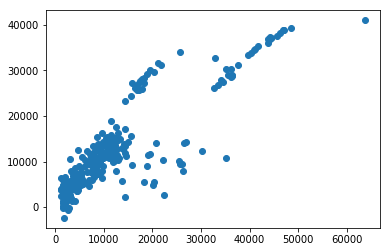

In [30]:
plt.scatter(y_test,pred)

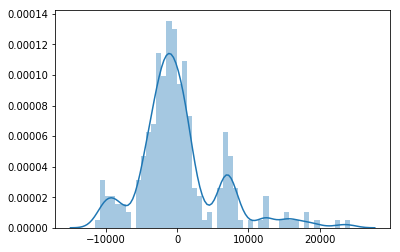

In [31]:
# Residual are the difference between the actual values and predicted values

# Residual --> Normal distribution means your model was a correct prediction for the data
sns.distplot((y_test-pred),bins=50);

In [32]:
print('MAE', metrics.mean_absolute_error(y_test, pred))
print('MSE', metrics.mean_squared_error(y_test, pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE 4027.9698489387015
MSE 33557334.37496507
RMSE 5792.869269624947


In [ ]:
#MAE 4036.8740283584293
#MSE 33748393.37059586
#RMSE 5809.3367410226665